https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series/notebook

https://otexts.com/fppkr/

In [7]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
# import plotly.plotly as py
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [2]:
!pip install chart-studio

# 1. Introduction to date and time
## 1.1 Importing time series data

In [8]:
google = pd.read_csv('C:/dataset/kaggle_1_Everything you can do with a time series/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

In [10]:
humidity = pd.read_csv('C:/dataset/kaggle_1_Everything you can do with a time series/historical-hourly-weather-data/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2017-11-29 20:00:00        NaN      81.0            NaN     93.0         24.0   
2017-11-29 21:00:00        NaN      71.0            NaN     87.0         21.0   
2017-11-29 22:00:00        NaN      71.0            NaN     93.0         23.0   
2017-11-29 23:00:00        NaN      71.0            NaN     87.0         14.0   
2017-11-30 00:00:00        NaN      76.0            NaN     75.0         56.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2017-11-29 20:00:00       72.0       18.0     68.0         37.0    18.0  ...   
2017-11-29 21:00:00       72.0       18.0     73.0         34.0    12.0  ...   
2017-11-29 22:00:00       68.0       17.0     60.0         32.0    15.0  ...   
2017-11-29 23:00:00       63.0       17.0     33.0         30.0    28.0  ...   
2017-11-30 00:00:00       72.0       17.0     23.0         34.0    31.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2017-11-29 20:00:00          27.0       NaN      64.0    37.0        NaN   
2017-11-29 21:00:00          29.0       NaN      59.0    74.0        NaN   
2017-11-29 22:00:00          31.0       NaN      66.0    74.0        NaN   
2017-11-29 23:00:00          26.0       NaN      58.0    56.0        NaN   
2017-11-30 00:00:00          32.0       NaN      58.0    56.0        NaN   

                     Tel Aviv District  Eilat  Haifa  Nahariyya  Jerusalem  
datetime                                                                    
2017-11-29 20:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 21:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 22:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 23:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-30 00:00:00                NaN    NaN    NaN        NaN        NaN  

[5 rows x 36 columns]

## 1.2 Cleaning and preparing time series data

In [5]:
google.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [6]:
humidity.isnull().sum()

Vancouver            1826
Portland              449
San Francisco         942
Seattle               289
Los Angeles           152
San Diego             344
Las Vegas             842
Phoenix              1308
Albuquerque           710
Denver               1808
San Antonio           564
Dallas                319
Houston               121
Kansas City           512
Minneapolis           510
Saint Louis          1289
Chicago              1109
Nashville             567
Indianapolis          695
Atlanta               422
Detroit               862
Jacksonville          209
Charlotte             589
Miami                1087
Pittsburgh            522
Toronto               728
Philadelphia          624
New York             1624
Montreal             1696
Boston                449
Beersheba             859
Tel Aviv District    1113
Eilat                 970
Haifa                 818
Nahariyya             817
Jerusalem             906
dtype: int64

In [7]:
humidity = humidity.iloc[1:] # ?
humidity = humidity.fillna(method='ffill') # (method='bfill) : 뒷방향으로 채우기
humidity.tail()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2017-11-29 20:00:00       87.0      81.0           22.0     93.0         24.0   
2017-11-29 21:00:00       87.0      71.0           22.0     87.0         21.0   
2017-11-29 22:00:00       87.0      71.0           22.0     93.0         23.0   
2017-11-29 23:00:00       87.0      71.0           22.0     87.0         14.0   
2017-11-30 00:00:00       87.0      76.0           22.0     75.0         56.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2017-11-29 20:00:00       72.0       18.0     68.0         37.0    18.0  ...   
2017-11-29 21:00:00       72.0       18.0     73.0         34.0    12.0  ...   
2017-11-29 22:00:00       68.0       17.0     60.0         32.0    15.0  ...   
2017-11-29 23:00:00       63.0       17.0     33.0         30.0    28.0  ...   
2017-11-30 00:00:00       72.0       17.0     23.0         34.0    31.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2017-11-29 20:00:00          27.0      58.0      64.0    37.0       57.0   
2017-11-29 21:00:00          29.0      58.0      59.0    74.0       57.0   
2017-11-29 22:00:00          31.0      58.0      66.0    74.0       57.0   
2017-11-29 23:00:00          26.0      58.0      58.0    56.0       57.0   
2017-11-30 00:00:00          32.0      58.0      58.0    56.0       57.0   

                     Tel Aviv District  Eilat  Haifa  Nahariyya  Jerusalem  
datetime                                                                    
2017-11-29 20:00:00               60.0  100.0   96.0       96.0       60.0  
2017-11-29 21:00:00               60.0  100.0   96.0       96.0       60.0  
2017-11-29 22:00:00               60.0  100.0   96.0       96.0       60.0  
2017-11-29 23:00:00               60.0  100.0   96.0       96.0       60.0  
2017-11-30 00:00:00               60.0  100.0   96.0       96.0       60.0  

[5 rows x 36 columns]

In [ ]:
'''
          C1        C2        C3
0       NaN -0.228791 -0.850988
1       NaN  0.564767       NaN
2 -0.834515       NaN -0.566917
3  0.242694       NaN -0.673298
4 -0.497041 -0.301435       NaN

> df.fillna(method='ffill') # Fill values forward

         C1        C2        C3
0       NaN -0.228791 -0.850988
1       NaN  0.564767 -0.850988
2 -0.834515  0.564767 -0.566917
3  0.242694  0.564767 -0.673298
4 -0.497041 -0.301435 -0.673298
'''

## 1.3 Visualizing the datasets

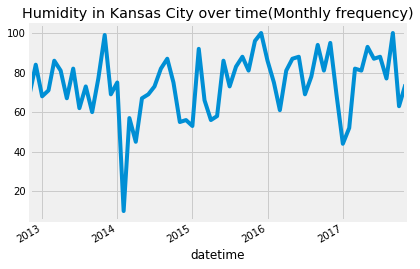

In [9]:
humidity["Kansas City"].asfreq('M').plot() # asfreq를 통해 월간 빈도로 변환
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

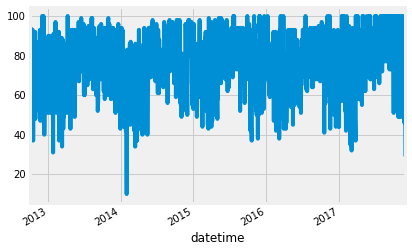

In [10]:
humidity["Kansas City"].asfreq('D').plot()
plt.show()

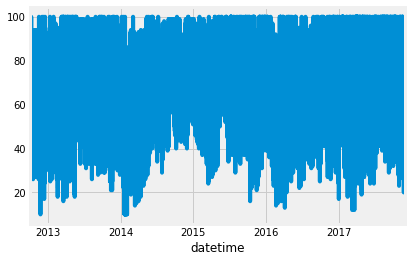

In [11]:
humidity["Kansas City"].plot()
plt.show()

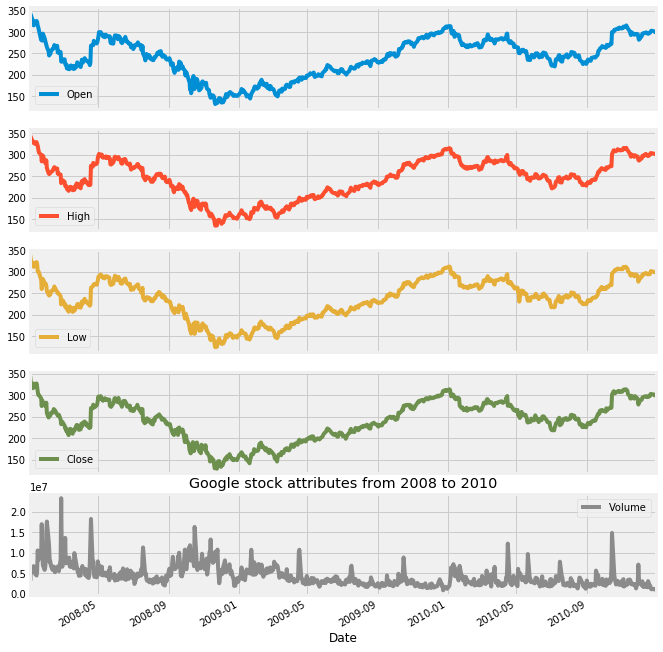

In [16]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
# plt.savefig('stocks.png')
plt.show()

In [13]:
google.head()

Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

## 1.4 Timestamps and Periods
타임 스탬프는 특정 시점을 나타내는 데 사용됩니다. 기간은 시간 간격을 나타냅니다. 기간은 주어진 기간에 특정 이벤트가 있는지 확인하는 데 사용될 수 있습니다. 또한 서로의 형태로 변환 될 수도 있습니다.

In [91]:
'''
s: 초
T: 분
H: 시간
D: 일(day)
B: 주말이 아닌 평일
W: 주(일요일)
W-MON: 주(월요일)
M: 각 달(month)의 마지막 날
MS: 각 달의 첫날
BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
BMS: 주말이 아닌 평일 중에서 각 달의 첫날
WOM-2THU: 각 달의 두번째 목요일
Q-JAN: 각 분기의 첫달의 마지막 날
Q-DEC: 각 분기의 마지막 달의 마지막 날
'''

'\ns: 초\nT: 분\nH: 시간\nD: 일(day)\nB: 주말이 아닌 평일\nW: 주(일요일)\nW-MON: 주(월요일)\nM: 각 달(month)의 마지막 날\nMS: 각 달의 첫날\nBM: 주말이 아닌 평일 중에서 각 달의 마지막 날\nBMS: 주말이 아닌 평일 중에서 각 달의 첫날\nWOM-2THU: 각 달의 두번째 목요일\nQ-JAN: 각 분기의 첫달의 마지막 날\nQ-DEC: 각 분기의 마지막 달의 마지막 날\n'

In [18]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [28]:
# Creating a period
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [29]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [31]:
print(period.start_time)
print(period.end_time)

2017-01-01 00:00:00
2017-01-01 23:59:59.999999999


In [32]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [33]:
print(new_period.start_time)
print(new_period.end_time)

2017-01-01 12:00:00
2017-01-01 12:59:59.999999999


In [34]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

## 1.5 Using date_range


date_range는 고정 빈도 datetimeindex를 반환하는 메서드입니다. 기존 데이터에 대한 고유 한 시계열 특성을 만들거나 사용자가 만든 시계열 특성을 중심으로 전체 데이터를 정렬 할 때 매우 유용합니다.

In [35]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [36]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [37]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [38]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

## 1.6 Using to_datetime
pandas.to_datetime ()은 인수를 datetime으로 변환하는 데 사용됩니다. 여기서 DataFrame은 날짜 / 시간 시리즈로 변환됩니다.

In [39]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

year  month  day
0  2015      2    4
1  2016      3    5

In [40]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [41]:
df2 = pd.to_datetime('01-01-2017')
df2

Timestamp('2017-01-01 00:00:00')

## 1.7 Shifting and lags

선택한 시간 빈도로 원하는 기간만큼 인덱스를 이동시킬 수 있음.

시계열을 과거와 비교할 때 유용

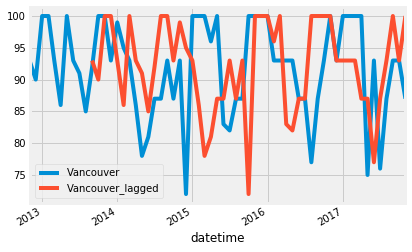

In [20]:
humidity["Vancouver"].asfreq('M').plot(legend=True)
shifted = humidity["Vancouver"].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

## 1.8 Resampling

### Upsampling
월간에서 일일 빈도로 리샘플링. 누락된 데이터를 채우거나 보간하는 작업
### Downsampling
매주 ~ 매월 빈도로 리샘플링. 기존 데이터의 집계가 포함됨.

In [22]:
# Let's use pressure data to demonstrate this
pressure = pd.read_csv('C:/dataset/kaggle_1_Everything you can do with a time series/historical-hourly-weather-data/pressure.csv', index_col='datetime', parse_dates=['datetime'])
pressure.tail()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2017-11-29 20:00:00        NaN    1031.0            NaN   1030.0       1016.0   
2017-11-29 21:00:00        NaN    1030.0            NaN   1030.0       1016.0   
2017-11-29 22:00:00        NaN    1030.0            NaN   1029.0       1015.0   
2017-11-29 23:00:00        NaN    1029.0            NaN   1028.0       1016.0   
2017-11-30 00:00:00        NaN    1029.0            NaN   1028.0       1015.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2017-11-29 20:00:00     1017.0     1021.0   1018.0       1025.0  1016.0  ...   
2017-11-29 21:00:00     1017.0     1020.0   1018.0       1024.0  1018.0  ...   
2017-11-29 22:00:00     1016.0     1020.0   1017.0       1024.0  1018.0  ...   
2017-11-29 23:00:00     1016.0     1020.0   1016.0       1024.0  1020.0  ...   
2017-11-30 00:00:00     1017.0     1019.0   1016.0       1024.0  1021.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2017-11-29 20:00:00        1021.0       NaN    1021.0  1017.0        NaN   
2017-11-29 21:00:00        1021.0       NaN    1023.0  1019.0        NaN   
2017-11-29 22:00:00        1022.0       NaN    1024.0  1019.0        NaN   
2017-11-29 23:00:00        1023.0       NaN    1026.0  1022.0        NaN   
2017-11-30 00:00:00        1024.0       NaN    1027.0  1023.0        NaN   

                     Tel Aviv District  Eilat  Haifa  Nahariyya  Jerusalem  
datetime                                                                    
2017-11-29 20:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 21:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 22:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 23:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-30 00:00:00                NaN    NaN    NaN        NaN        NaN  

[5 rows x 36 columns]

In [54]:
pressure.isna().sum()

Vancouver            4234
Portland                4
San Francisco         815
Seattle                13
Los Angeles           252
San Diego             175
Las Vegas              88
Phoenix               594
Albuquerque           456
Denver                543
San Antonio            17
Dallas                 60
Houston                 9
Kansas City           121
Minneapolis            17
Saint Louis            68
Chicago               725
Nashville             147
Indianapolis          289
Atlanta                49
Detroit                 5
Jacksonville           15
Charlotte               3
Miami                 794
Pittsburgh             46
Toronto               175
Philadelphia            4
New York             1041
Montreal              994
Boston                  7
Beersheba             806
Tel Aviv District     930
Eilat                 792
Haifa                 798
Nahariyya             795
Jerusalem             799
dtype: int64

In [48]:
pressure.head()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2012-10-01 12:00:00        NaN       NaN            NaN      NaN          NaN   
2012-10-01 13:00:00        NaN    1024.0         1009.0   1027.0       1013.0   
2012-10-01 14:00:00        NaN    1024.0         1009.0   1027.0       1013.0   
2012-10-01 15:00:00        NaN    1024.0         1009.0   1028.0       1013.0   
2012-10-01 16:00:00        NaN    1024.0         1009.0   1028.0       1013.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2012-10-01 12:00:00        NaN        NaN      NaN          NaN     NaN  ...   
2012-10-01 13:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 14:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 15:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 16:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2012-10-01 12:00:00           NaN       NaN       NaN     NaN        NaN   
2012-10-01 13:00:00        1014.0    1012.0    1001.0  1014.0      984.0   
2012-10-01 14:00:00        1014.0    1012.0     986.0  1014.0      984.0   
2012-10-01 15:00:00        1014.0    1012.0     945.0  1014.0      984.0   
2012-10-01 16:00:00        1014.0    1012.0     904.0  1014.0      984.0   

                     Tel Aviv District   Eilat   Haifa  Nahariyya  Jerusalem  
datetime                                                                      
2012-10-01 12:00:00                NaN  1011.0     NaN        NaN        NaN  
2012-10-01 13:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 14:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 15:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 16:00:00             1012.0  1010.0  1013.0     1013.0      990.0  

[5 rows x 36 columns]

In [23]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.tail()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2017-11-29 20:00:00     1021.0    1031.0         1013.0   1030.0       1016.0   
2017-11-29 21:00:00     1021.0    1030.0         1013.0   1030.0       1016.0   
2017-11-29 22:00:00     1021.0    1030.0         1013.0   1029.0       1015.0   
2017-11-29 23:00:00     1021.0    1029.0         1013.0   1028.0       1016.0   
2017-11-30 00:00:00     1021.0    1029.0         1013.0   1028.0       1015.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2017-11-29 20:00:00     1017.0     1021.0   1018.0       1025.0  1016.0  ...   
2017-11-29 21:00:00     1017.0     1020.0   1018.0       1024.0  1018.0  ...   
2017-11-29 22:00:00     1016.0     1020.0   1017.0       1024.0  1018.0  ...   
2017-11-29 23:00:00     1016.0     1020.0   1016.0       1024.0  1020.0  ...   
2017-11-30 00:00:00     1017.0     1019.0   1016.0       1024.0  1021.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2017-11-29 20:00:00        1021.0    1020.0    1021.0  1017.0      984.0   
2017-11-29 21:00:00        1021.0    1020.0    1023.0  1019.0      984.0   
2017-11-29 22:00:00        1022.0    1020.0    1024.0  1019.0      984.0   
2017-11-29 23:00:00        1023.0    1020.0    1026.0  1022.0      984.0   
2017-11-30 00:00:00        1024.0    1020.0    1027.0  1023.0      984.0   

                     Tel Aviv District  Eilat   Haifa  Nahariyya  Jerusalem  
datetime                                                                     
2017-11-29 20:00:00             1011.0  968.0  1023.0     1023.0     1011.0  
2017-11-29 21:00:00             1011.0  968.0  1023.0     1023.0     1011.0  
2017-11-29 22:00:00             1011.0  968.0  1023.0     1023.0     1011.0  
2017-11-29 23:00:00             1011.0  968.0  1023.0     1023.0     1011.0  
2017-11-30 00:00:00             1011.0  968.0  1023.0     1023.0     1011.0  

[5 rows x 36 columns]

In [56]:
pressure.isna().sum()

Vancouver            20
Portland              0
San Francisco         0
Seattle               0
Los Angeles           0
San Diego             0
Las Vegas             0
Phoenix               0
Albuquerque           0
Denver                0
San Antonio           0
Dallas                0
Houston               0
Kansas City           0
Minneapolis           0
Saint Louis           0
Chicago               0
Nashville             0
Indianapolis          0
Atlanta               0
Detroit               0
Jacksonville          0
Charlotte             0
Miami                 0
Pittsburgh            0
Toronto               0
Philadelphia          0
New York              0
Montreal              0
Boston                0
Beersheba             0
Tel Aviv District     0
Eilat                 0
Haifa                 0
Nahariyya             0
Jerusalem             0
dtype: int64

In [24]:
pressure = pressure.fillna(method='bfill')
pressure.tail()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2017-11-29 20:00:00     1021.0    1031.0         1013.0   1030.0       1016.0   
2017-11-29 21:00:00     1021.0    1030.0         1013.0   1030.0       1016.0   
2017-11-29 22:00:00     1021.0    1030.0         1013.0   1029.0       1015.0   
2017-11-29 23:00:00     1021.0    1029.0         1013.0   1028.0       1016.0   
2017-11-30 00:00:00     1021.0    1029.0         1013.0   1028.0       1015.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2017-11-29 20:00:00     1017.0     1021.0   1018.0       1025.0  1016.0  ...   
2017-11-29 21:00:00     1017.0     1020.0   1018.0       1024.0  1018.0  ...   
2017-11-29 22:00:00     1016.0     1020.0   1017.0       1024.0  1018.0  ...   
2017-11-29 23:00:00     1016.0     1020.0   1016.0       1024.0  1020.0  ...   
2017-11-30 00:00:00     1017.0     1019.0   1016.0       1024.0  1021.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2017-11-29 20:00:00        1021.0    1020.0    1021.0  1017.0      984.0   
2017-11-29 21:00:00        1021.0    1020.0    1023.0  1019.0      984.0   
2017-11-29 22:00:00        1022.0    1020.0    1024.0  1019.0      984.0   
2017-11-29 23:00:00        1023.0    1020.0    1026.0  1022.0      984.0   
2017-11-30 00:00:00        1024.0    1020.0    1027.0  1023.0      984.0   

                     Tel Aviv District  Eilat   Haifa  Nahariyya  Jerusalem  
datetime                                                                     
2017-11-29 20:00:00             1011.0  968.0  1023.0     1023.0     1011.0  
2017-11-29 21:00:00             1011.0  968.0  1023.0     1023.0     1011.0  
2017-11-29 22:00:00             1011.0  968.0  1023.0     1023.0     1011.0  
2017-11-29 23:00:00             1011.0  968.0  1023.0     1023.0     1011.0  
2017-11-30 00:00:00             1011.0  968.0  1023.0     1023.0     1011.0  

[5 rows x 36 columns]

In [25]:
pressure.isna().sum()

Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

In [ ]:
# ffill : nan 값을 앞의 데이터로 대체하고,
# bffill : 앞 데이터가 없는 데이터들의 경우, 뒷 데이터로 대체하여 간격을 채움

In [26]:
# Shape before resampling(downsampling)
pressure.shape

(45252, 36)

In [60]:
pressure.head()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2012-10-01 13:00:00      807.0    1024.0         1009.0   1027.0       1013.0   
2012-10-01 14:00:00      807.0    1024.0         1009.0   1027.0       1013.0   
2012-10-01 15:00:00      807.0    1024.0         1009.0   1028.0       1013.0   
2012-10-01 16:00:00      807.0    1024.0         1009.0   1028.0       1013.0   
2012-10-01 17:00:00      807.0    1024.0         1009.0   1029.0       1013.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2012-10-01 13:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 14:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 15:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 16:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 17:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2012-10-01 13:00:00        1014.0    1012.0    1001.0  1014.0      984.0   
2012-10-01 14:00:00        1014.0    1012.0     986.0  1014.0      984.0   
2012-10-01 15:00:00        1014.0    1012.0     945.0  1014.0      984.0   
2012-10-01 16:00:00        1014.0    1012.0     904.0  1014.0      984.0   
2012-10-01 17:00:00        1014.0    1012.0     863.0  1014.0      984.0   

                     Tel Aviv District   Eilat   Haifa  Nahariyya  Jerusalem  
datetime                                                                      
2012-10-01 13:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 14:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 15:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 16:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 17:00:00             1012.0  1010.0  1013.0     1013.0      990.0  

[5 rows x 36 columns]

In [27]:
# We downsample from hourly to 3 day frequency aggregated using mean
# 평균을 사용하여 시간을 3일 빈도로 다운 샘플링
pressure = pressure.resample('3D').mean()
pressure.head()

Vancouver     Portland  San Francisco      Seattle  Los Angeles  \
datetime                                                                        
2012-10-01   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-04  1019.083333  1023.041667    1014.694444  1028.305556  1015.555556   
2012-10-07  1013.930556  1017.444444    1016.597222  1018.736111  1013.416667   
2012-10-10  1015.000000  1015.430556    1014.833333  1018.416667  1010.694444   
2012-10-13  1008.152778  1018.111111    1021.069444  1015.930556  1017.277778   

              San Diego    Las Vegas      Phoenix  Albuquerque       Denver  \
datetime                                                                      
2012-10-01  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-04  1016.277778  1013.194444  1014.097222  1019.972222  1020.666667   
2012-10-07  1014.222222  1012.888889  1011.861111  1005.833333  1020.458333   
2012-10-10  1014.013889  1000.166667  1005.611111   986.000000   984.486111   
2012-10-13  1018.375000  1015.666667  1015.500000  1013.625000  1010.444444   

            ...  Philadelphia     New York     Montreal       Boston  \
datetime    ...                                                        
2012-10-01  ...   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-04  ...   1018.097222  1017.680556  1017.180556  1019.805556   
2012-10-07  ...   1017.958333  1016.750000  1014.152778  1016.305556   
2012-10-10  ...   1018.694444  1017.916667  1016.166667  1017.319444   
2012-10-13  ...   1025.055556  1024.388889  1020.805556  1023.736111   

             Beersheba  Tel Aviv District        Eilat        Haifa  \
datetime                                                              
2012-10-01  985.050847        1012.949153  1011.796610  1013.000000   
2012-10-04  984.930556        1013.083333  1012.611111  1013.000000   
2012-10-07  982.972222        1013.027778  1007.555556  1013.000000   
2012-10-10  979.763889        1006.527778   998.763889  1012.333333   
2012-10-13  984.527778        1013.027778  1007.194444  1013.000000   

              Nahariyya   Jerusalem  
datetime                             
2012-10-01  1013.000000  990.525424  
2012-10-04  1013.000000  990.083333  
2012-10-07  1013.000000  989.833333  
2012-10-10  1012.333333  987.888889  
2012-10-13  1013.000000  990.430556  

[5 rows x 36 columns]

In [28]:
# Shape after resampling(downsampling)
pressure.shape

(629, 36)

In [29]:
# upsample from 3 day frequency to daily frequency
pressure = pressure.resample('D').pad()
pressure.head()

Vancouver     Portland  San Francisco      Seattle  Los Angeles  \
datetime                                                                        
2012-10-01   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-02   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-03   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-04  1019.083333  1023.041667    1014.694444  1028.305556  1015.555556   
2012-10-05  1019.083333  1023.041667    1014.694444  1028.305556  1015.555556   

              San Diego    Las Vegas      Phoenix  Albuquerque       Denver  \
datetime                                                                      
2012-10-01  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-02  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-03  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-04  1016.277778  1013.194444  1014.097222  1019.972222  1020.666667   
2012-10-05  1016.277778  1013.194444  1014.097222  1019.972222  1020.666667   

            ...  Philadelphia     New York     Montreal       Boston  \
datetime    ...                                                        
2012-10-01  ...   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-02  ...   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-03  ...   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-04  ...   1018.097222  1017.680556  1017.180556  1019.805556   
2012-10-05  ...   1018.097222  1017.680556  1017.180556  1019.805556   

             Beersheba  Tel Aviv District        Eilat   Haifa  Nahariyya  \
datetime                                                                    
2012-10-01  985.050847        1012.949153  1011.796610  1013.0     1013.0   
2012-10-02  985.050847        1012.949153  1011.796610  1013.0     1013.0   
2012-10-03  985.050847        1012.949153  1011.796610  1013.0     1013.0   
2012-10-04  984.930556        1013.083333  1012.611111  1013.0     1013.0   
2012-10-05  984.930556        1013.083333  1012.611111  1013.0     1013.0   

             Jerusalem  
datetime                
2012-10-01  990.525424  
2012-10-02  990.525424  
2012-10-03  990.525424  
2012-10-04  990.083333  
2012-10-05  990.083333  

[5 rows x 36 columns]

In [30]:
# Shape after resampling(upsampling)
pressure.shape

(1885, 36)

## 2. Finance and statistics
### 2.1 Percent change

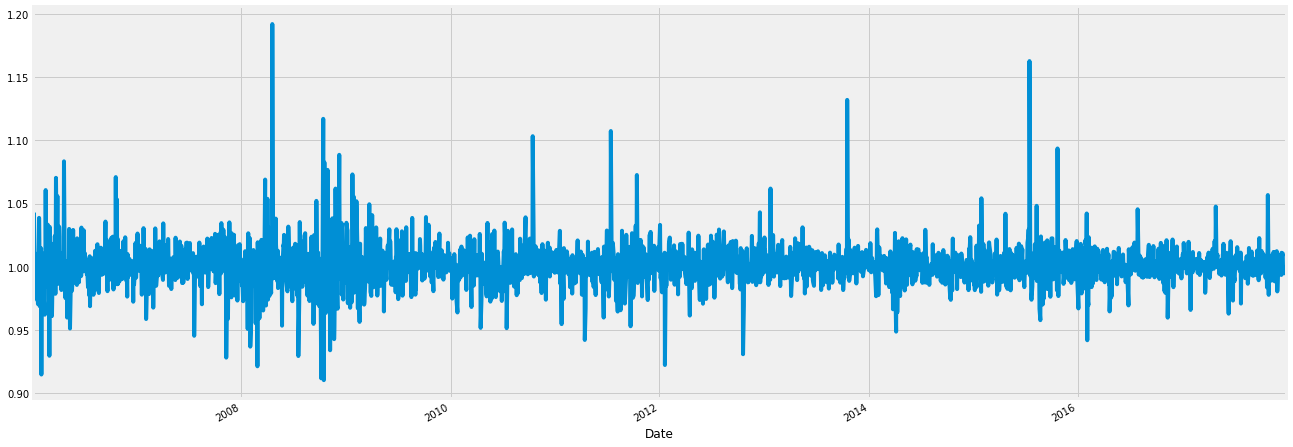

In [33]:
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,8))

In [39]:
google.High.head()

Date
2006-01-03    218.05
2006-01-04    224.70
2006-01-05    226.00
2006-01-06    235.49
2006-01-09    236.94
Name: High, dtype: float64

In [37]:
google.High.shift().head()

Date
2006-01-03       NaN
2006-01-04    218.05
2006-01-05    224.70
2006-01-06    226.00
2006-01-09    235.49
Name: High, dtype: float64

In [40]:
google.head()

Open    High     Low   Close    Volume   Name    Change
Date                                                                 
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL       NaN
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL  1.030498
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL  1.005785
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL  1.041991
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL  1.006157

In [ ]:
'''
2018-01-31    1.764052
2018-02-28    0.400157
2018-03-31    0.978738
2018-04-30    2.240893

> ts.shift()
2018-01-31         NaN
2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738

'''

## 2.2 Stock returns(수익률)

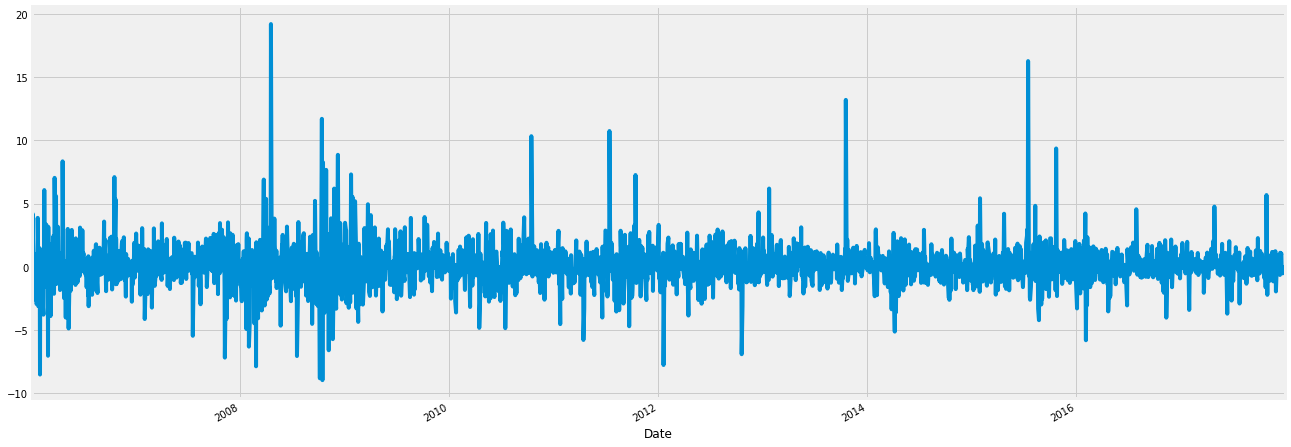

In [43]:
google['Return'] = google.Change.sub(1).mul(100) # 1 빼고 100 곱하기
google['Return'].plot(figsize=(20,8))

In [46]:
google.head(10)

Open    High     Low   Close    Volume   Name    Change  \
Date                                                                    
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL       NaN   
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL  1.030498   
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL  1.005785   
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL  1.041991   
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL  1.006157   
2006-01-10  232.44  235.36  231.25  235.11   9104719  GOOGL  0.993332   
2006-01-11  235.87  237.79  234.82  236.05   9008664  GOOGL  1.010325   
2006-01-12  237.10  237.73  230.98  232.05  10125212  GOOGL  0.999748   
2006-01-13  232.39  233.68  231.04  233.36   7660220  GOOGL  0.982964   
2006-01-17  231.76  235.18  231.50  233.79   8335300  GOOGL  1.006419   

              Return  
Date                  
2006-01-03       NaN  
2006-01-04  3.049759  
2006-01-05  0.578549  
2006-01-06  4.199115  
2006-01-09  0.615737  
2006-01-10 -0.666835  
2006-01-11  1.032461  
2006-01-12 -0.025232  
2006-01-13 -1.703613  
2006-01-17  0.641903

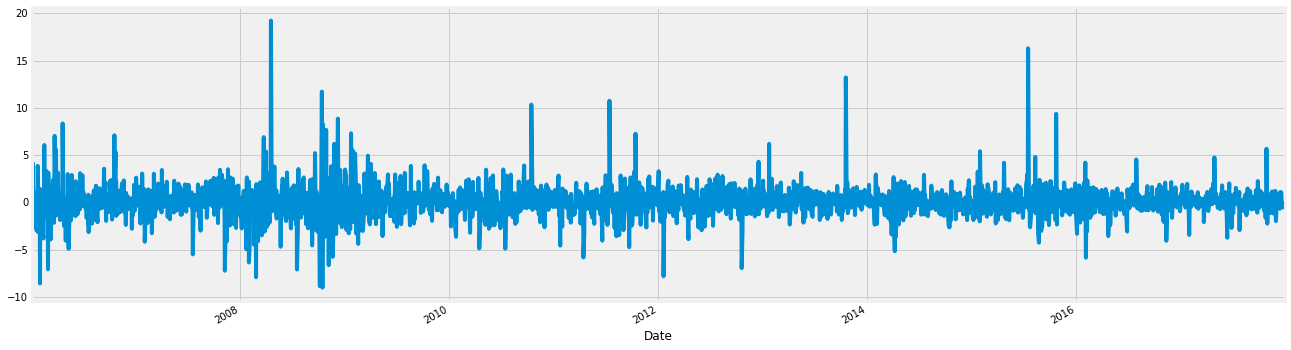

In [44]:
google.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns

In [ ]:
'''
pct_change() ?
: 퍼센트 변화율 계산
'''

## 2.3 Absolute change in successive rows

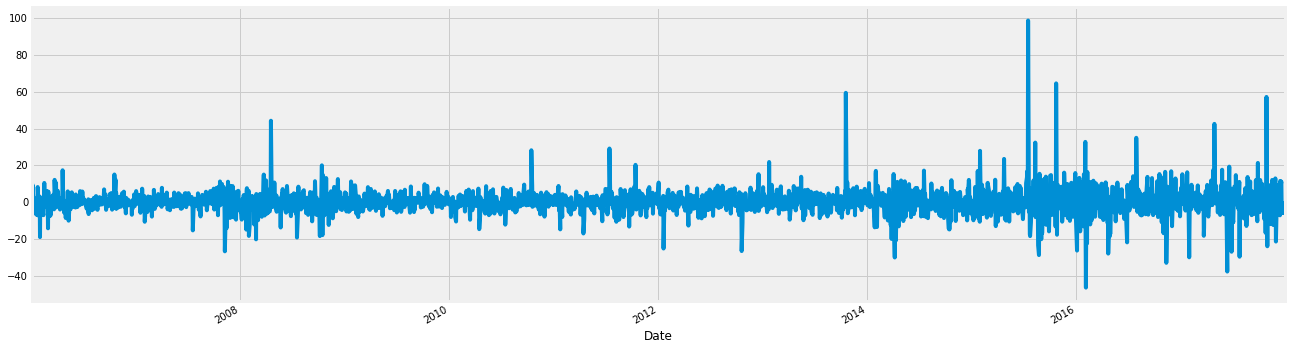

In [47]:
google.High.diff().plot(figsize=(20,6))

In [49]:
google.High.diff().head()

Date
2006-01-03     NaN
2006-01-04    6.65
2006-01-05    1.30
2006-01-06    9.49
2006-01-09    1.45
Name: High, dtype: float64

In [51]:
google.head(10)

Open    High     Low   Close    Volume   Name    Change  \
Date                                                                    
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL       NaN   
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL  1.030498   
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL  1.005785   
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL  1.041991   
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL  1.006157   
2006-01-10  232.44  235.36  231.25  235.11   9104719  GOOGL  0.993332   
2006-01-11  235.87  237.79  234.82  236.05   9008664  GOOGL  1.010325   
2006-01-12  237.10  237.73  230.98  232.05  10125212  GOOGL  0.999748   
2006-01-13  232.39  233.68  231.04  233.36   7660220  GOOGL  0.982964   
2006-01-17  231.76  235.18  231.50  233.79   8335300  GOOGL  1.006419   

              Return  
Date                  
2006-01-03       NaN  
2006-01-04  3.049759  
2006-01-05  0.578549  
2006-01-06  4.199115  
2006-01-09  0.615737  
2006-01-10 -0.666835  
2006-01-11  1.032461  
2006-01-12 -0.025232  
2006-01-13 -1.703613  
2006-01-17  0.641903

## 2.4 Comparing two or more time series

2 개의 시계열을 정규화하여 비교합니다. 이것은 모든 시계열의 각 시계열 요소를 첫 번째 요소로 나눔으로써 달성됩니다. 이 방법으로 두 시리즈 모두 같은 지점에서 시작하여 쉽게 비교할 수 있습니다.

정규화 하는 이유

각 컬럼에 들어있는 데이터의 상대적 크기로 분석결과가 달라질 수 있음. 예를 들어 A변수는 0~1000까지의 값을, B변수는 0~10까지의 값을 갖는다고 하자. 이 경우 상대적으로 큰 숫자 값을 갖는 A변수의 영향이 더 커짐. 따라서 숫자 데이터의 상대적인 크기 차이를 제거할 필요가 있음. 즉 데이터의 scale을 통일해야함.

In [54]:
# We choose microsoft stocks to compare them with google
microsoft = pd.read_csv('C:/dataset/kaggle_1_Everything you can do with a time series/stock-time-series-20050101-to-20171231/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

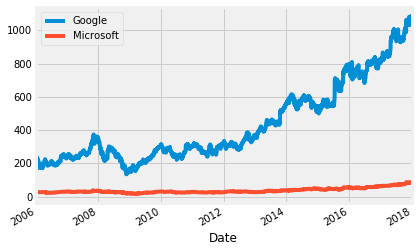

In [55]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

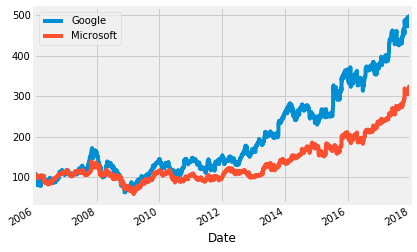

In [56]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google','Microsoft'])
plt.show()

In [58]:
google.High.head()

Date
2006-01-03    218.05
2006-01-04    224.70
2006-01-05    226.00
2006-01-06    235.49
2006-01-09    236.94
Name: High, dtype: float64

In [57]:
normalized_google.head()

Date
2006-01-03    100.000000
2006-01-04    103.049759
2006-01-05    103.645953
2006-01-06    107.998166
2006-01-09    108.663151
Name: High, dtype: float64

In [61]:
microsoft.High.head()

Date
2006-01-03    27.00
2006-01-04    27.08
2006-01-05    27.13
2006-01-06    27.00
2006-01-09    27.07
Name: High, dtype: float64

In [62]:
normalized_microsoft.head()

Date
2006-01-03    100.000000
2006-01-04    100.296296
2006-01-05    100.481481
2006-01-06    100.000000
2006-01-09    100.259259
Name: High, dtype: float64

## 2.5 Window functions
### Rolling
동일한 사이즈만큼 옆으로 이동하면서 연산. 일정 범위에서 동일한 연산을 할 때 유용

ex. 사이즈가 2고, 평균 내는 연산 -> (1,2) 평균 내고 (2,3) 평균 내고 (3,4) 평균 내고...
### Expanding
사이즈를 키워가며 연산
ex. (1,2) 평균 (1,2,3) 평균 (1,2,3,4) 평균 ...

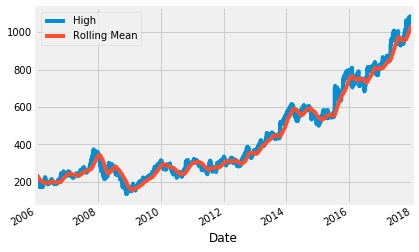

In [92]:
# Rolling window functions
rolling_google = google.High.rolling('90D').mean()
google.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

In [75]:
google.High.head(10)

Date
2006-01-03    218.05
2006-01-04    224.70
2006-01-05    226.00
2006-01-06    235.49
2006-01-09    236.94
2006-01-10    235.36
2006-01-11    237.79
2006-01-12    237.73
2006-01-13    233.68
2006-01-17    235.18
Name: High, dtype: float64

In [72]:
rolling_google2 = google.High.rolling('3D').mean()

In [74]:
rolling_google2.head(10)

Date
2006-01-03    218.050000
2006-01-04    221.375000
2006-01-05    222.916667
2006-01-06    228.730000
2006-01-09    236.940000
2006-01-10    236.150000
2006-01-11    236.696667
2006-01-12    236.960000
2006-01-13    236.400000
2006-01-17    235.180000
Name: High, dtype: float64

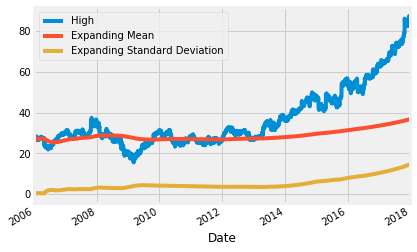

In [80]:
# Expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

## 2.6 OHLC(Open-high-low-close) charts

In [93]:
# OHLC chart of June 2008
trace = go.Ohlc(x=google['06-2008'].index,
                open=google['06-2008'].Open,
                high=google['06-2008'].High,
                low=google['06-2008'].Low,
                close=google['06-2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [94]:
# OHLC chart of 2008
trace = go.Ohlc(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [95]:
# OHLC chart
trace = go.Ohlc(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

## 2.7 Candlestick charts

In [96]:
# Candlestick chart of march 2008
trace = go.Candlestick(x=google['03-2008'].index,
                open=google['03-2008'].Open,
                high=google['03-2008'].High,
                low=google['03-2008'].Low,
                close=google['03-2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [97]:
# Candlestick chart of 2008
trace = go.Candlestick(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [98]:
# Candlestick chart of 2006-2018
trace = go.Candlestick(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_candlestick')

## 2.8 Autocorrelation and Partial Autocorrelation
### Autocorrelation(ACF, 자기상관계수)
: k시간 떨어진 값들의 상관계수

### Partial Autocorrelation(PACF, 편자기상관계수)
: 서로 다른 두 지점 사이의 관곌르 분석할 때 중간에 있는 값들의 영향을 제외시킨 상관관계 개념

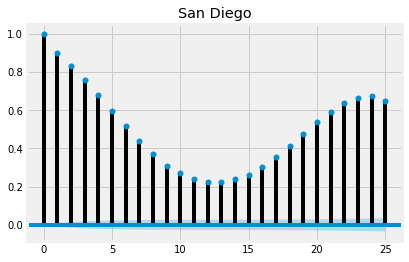

In [100]:
# Autocorrelation of humidity of San Diego
plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

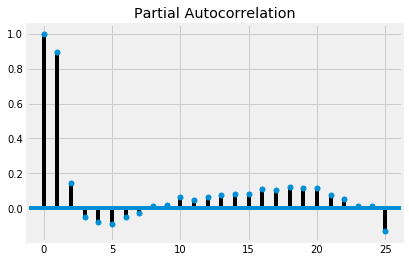

In [101]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["San Diego"],lags=25)
plt.show()

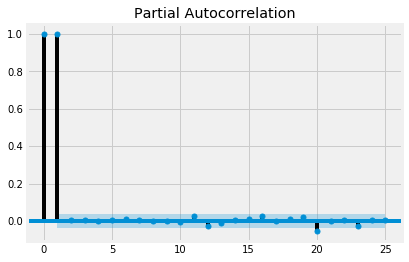

In [102]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(microsoft["Close"],lags=25)
plt.show()

## 3. Time series decomposition and Random walks
### 3.1. Trends, seasonality and noise
- Trends : 자료가 오르거나 내리는 추세
- seasonality : 요일, 월, 사계절 각 분기에 의한 변화 등 고정된 주기에 따라 자료가 변하는 경우
- noise : 특이치 또는 누락값

In [104]:
'''
Time series decomposition(시계열 분해) ?
시계열에 영향을 주는 일반적인 요인을 시계열에서 분리해 분석하는 방법
'''

'\nTime series decomposition(시계열 분해) ?\n시계열에 영향을 주는 일반적인 요인을 시계열에서 분리해 분석하는 방법\n'

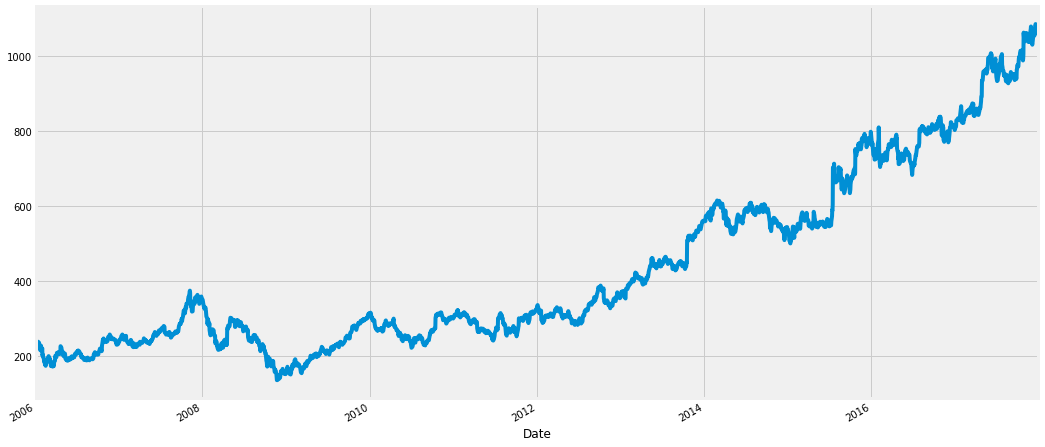

In [105]:
# Let's take Google stocks High for this
google["High"].plot(figsize=(16,8))

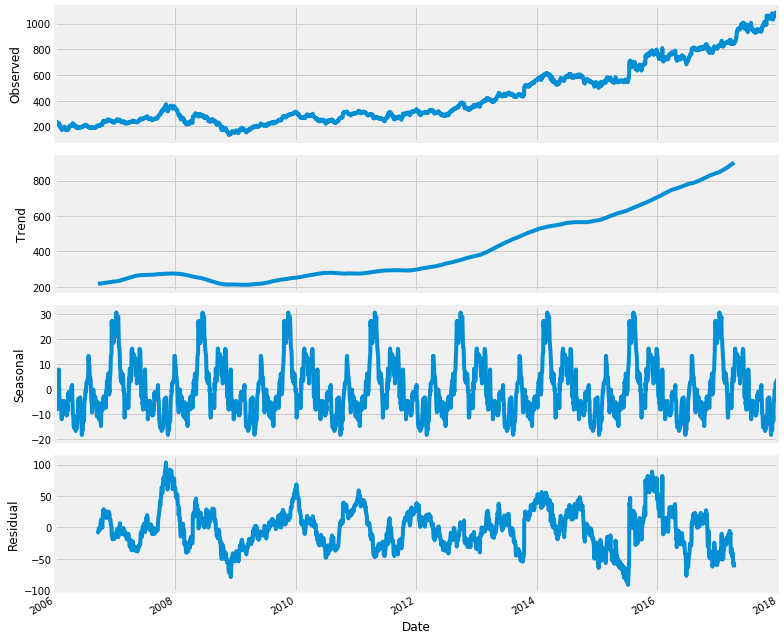

In [13]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],freq=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

- 분명한 상승 추세
- seasonal 변화가 일정함
- 불규칙 요인

### 3.2 White noise
시계열 분석에서 오차항을 의미, 자기상관이 없는 시계열

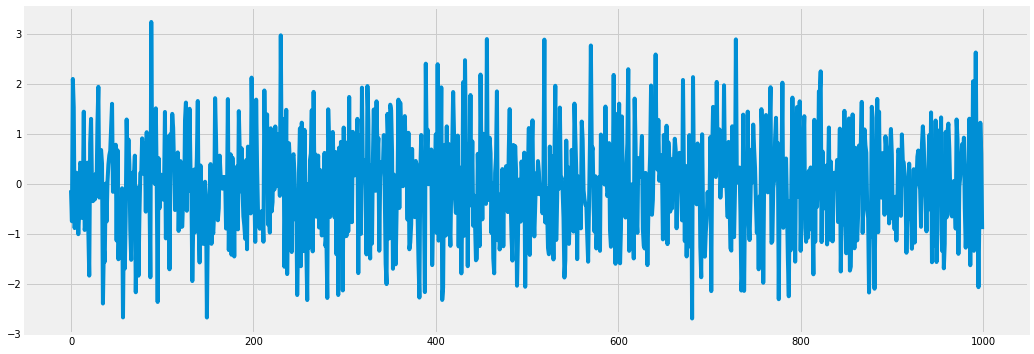

In [11]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

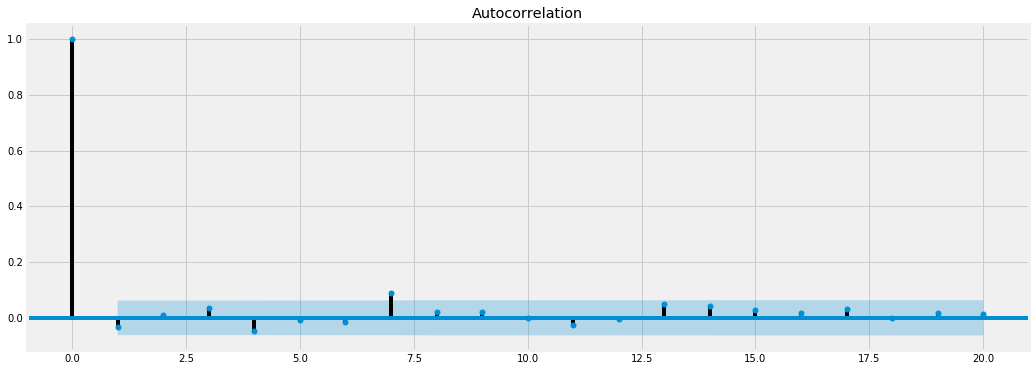

In [109]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

## 3.4 Stationarity(정상성)
- 시계열 데이터의 평균과 분산이 일정할 때 정상성을 갖는다고 함
- 추세나 계절성이 있는 시계열은 정상성을 갖지 않음
- 데이터가 정상성을 가지지 않으면 분석이 어렵기 때문에 정상성을 갖도록 전처리 해야 함.
- 반면 백색잡음 시계열은 정상성을 나타내는 시계열 - 언제 관찰하는지에 상관이 없고, 시간에 따라 어떤 시점에서 보더라도 똑같이 보일 것이기 때문

평균이 일정하지 않으면 -> 차분(diff, 연이는 관측값들의 차이를 계산하는 것)
- 시계열의 수준에서 나타나는 변화를 제거하여 시계열의 평균 변화를 일정하게 만드는데 도움이 됨. 결과적으로 추세나 계절성이 제거(감소)됨
- 정상성을 갖지 않은 데이터는 ACF가 느리게 감소하지만, 정상성을 갖는 데이터는 ACF가 비교적 빠르게 0으로 떨어짐

분산이 일정하지 않으면 -> 변환

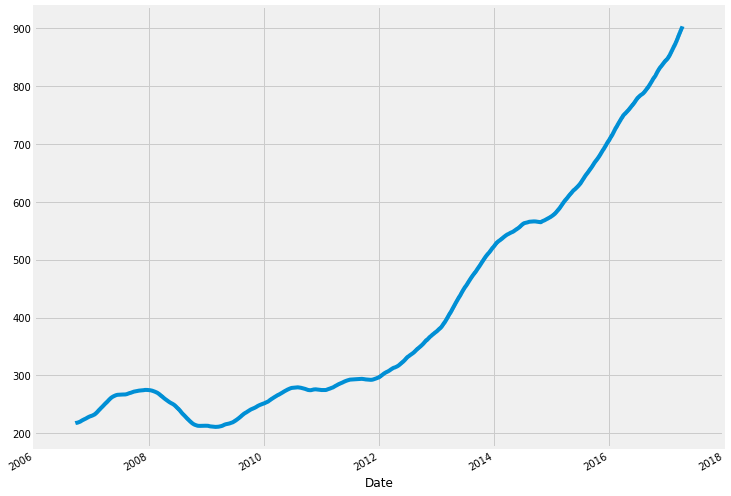

In [14]:
# The original non-stationary plot
decomposed_google_volume.trend.plot()

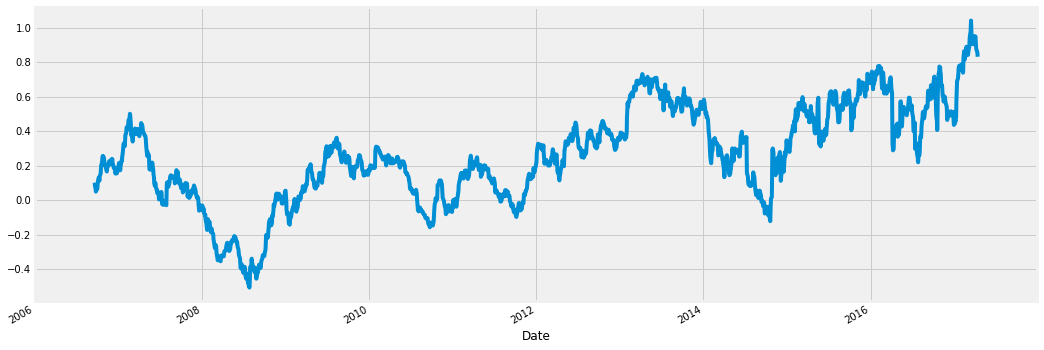

In [114]:
# The new stationary plot
decomposed_google_volume.trend.diff().plot()

## 4. Modelling using statstools
### 4.1 자기회귀모형(AR(p) 모형, autoregressive model)
- p시점 전의 자료가 현재 자료에 영향을 주는 모형
- Z_t = ∅_1 Z_(t-1) + ∅_2 Z_(t-2) + ⋯ + ∅_p Z_(t-p) + α_t
- 변수의 과거 값의 선형 조합을 이용하여 관심 있는 변수를 예측

In [115]:
'''
∙ Z_t : 현재 시점의 시계열 자료 
∙ Z_(t-1), Z_(t-2), …, Z_p : 이전, 그 이전 시점 p의 시계열 자료
∙ ∅_p : p시점이 현재에 어느 정도 영향을 주는지를 나타내는 모수
∙ α_t : 백색잡음, 오차항을 의미
'''

'\n∙ Z_t : 현재 시점의 시계열 자료 \n∙ Z_(t-1), Z_(t-2), …, Z_p : 이전, 그 이전 시점 p의 시계열 자료\n∙ ∅_p : p시점이 현재에 어느 정도 영향을 주는지를 나타내는 모수\n∙ α_t : 백색잡음, 오차항을 의미\n\n'

#### Simulating AR(1) model

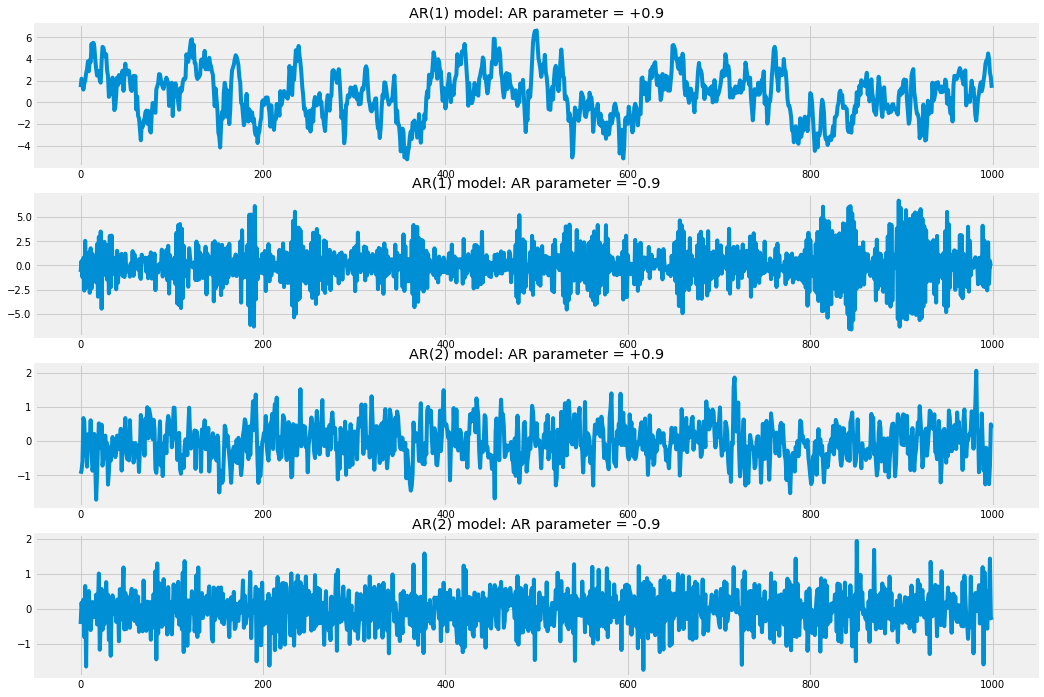

In [116]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later

# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)

# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)

# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

#### Forecasting a simulated model

In [118]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Sun, 03 May 2020   AIC                           2837.403
Time:                        04:00:19   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    Roots                                    
    

#### Predicting the models

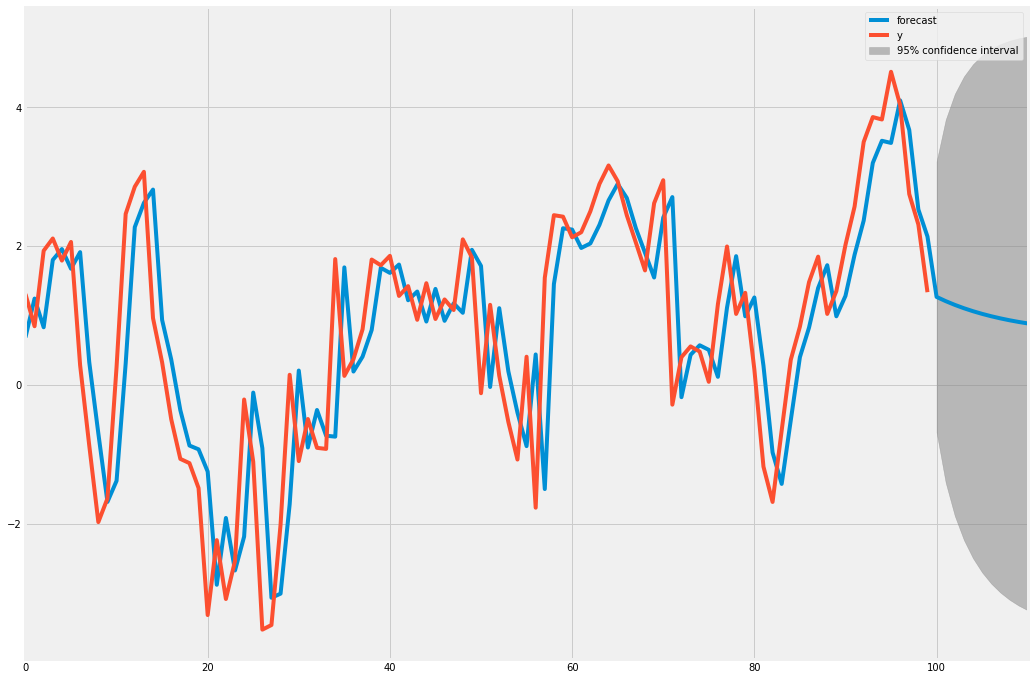

In [119]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

In [120]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408054475798894.


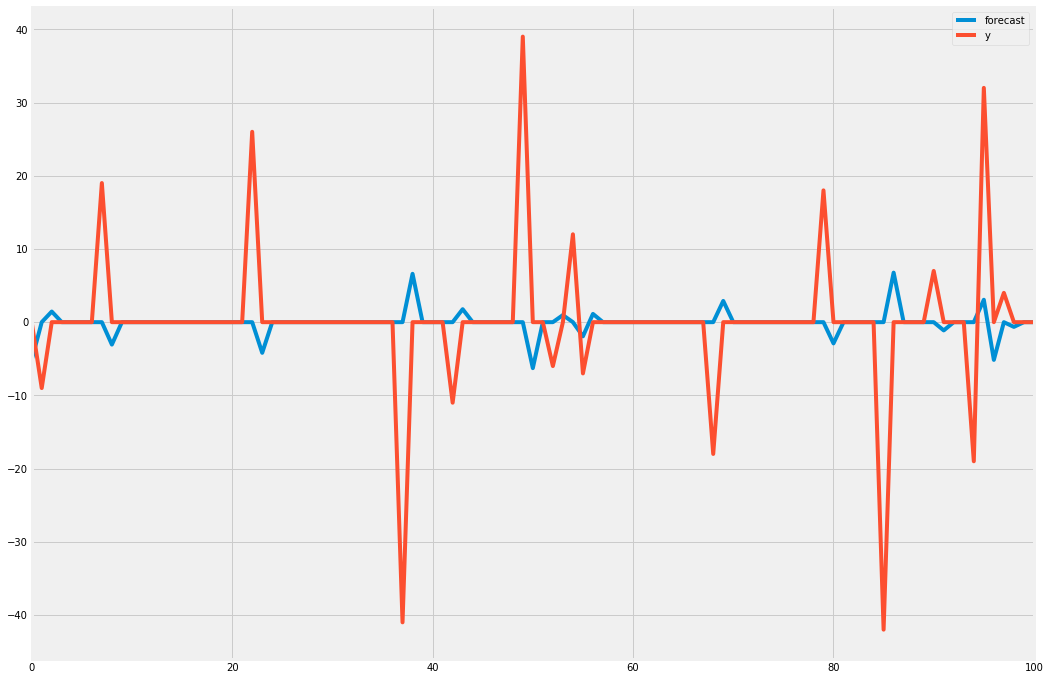

In [121]:
# Predicting humidity level of Montreal
humid = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [122]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 7.2183885634741936.


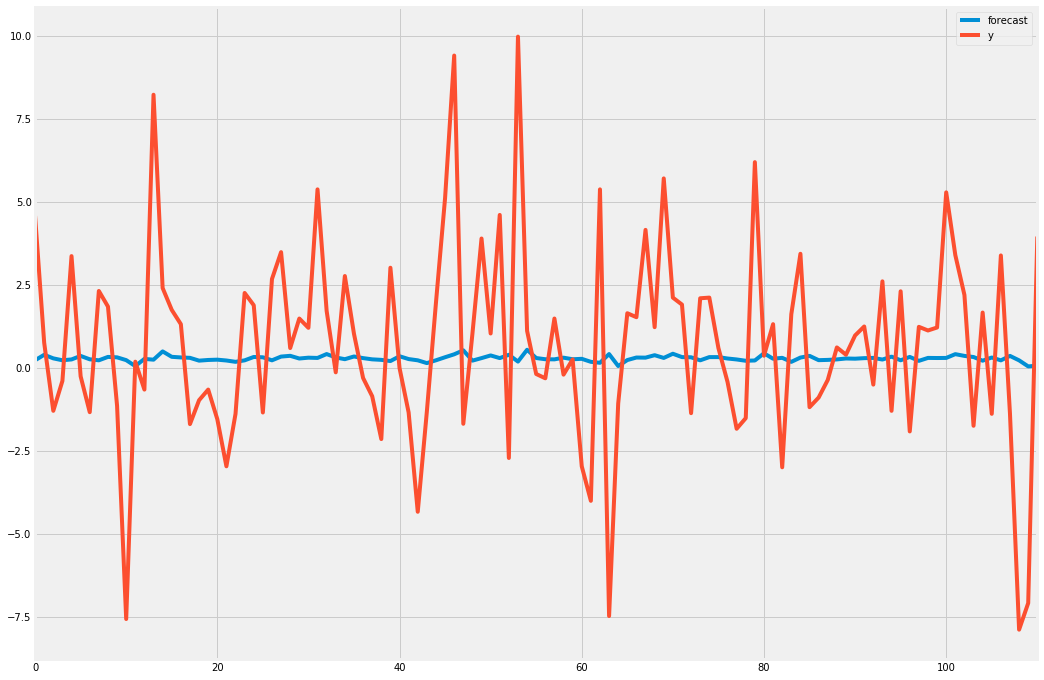

In [123]:
# Predicting closing prices of google
humid = ARMA(google["Close"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=900, end=1010)
plt.show()

### 4.2 이동평균 모형(MA 모형, Moving Average model)
- 유한한 개수의 백색잡음의 결합이므로 언제나 정상성을 만족
- 1차 이동평균모형(MA1 모형)은 이동평균모형 중에서 가장 간단한 모형으로 시계열이 같은 시점의 백색잡음과 바로 전 백색잡음의 결합으로 이뤄진 모형
- Z_t = α_t - θ_1 α_(t-1) - θ_2 α_(t-2) - … - θ_p α_(t-p)
- 2차 이동평균모형은 바로 전 시점의 백색잡음과 시차가 2인 백색잡음의 결합으로 이뤄진 모형
- Z_t = α_t - θ_1 α_(t-1)


### 4.3 자기회귀이동평균 모형(ARMA 모형, AutoRegressive MovingAverage)

### 4.4 자기회귀누적이동평균 모형(ARIMA(p, d, q)모형)
- p : 자기회귀 부분의 차수
- d : 1차 차분이 포함된 정도
- q : 이동 평균 부분의 차수